**¿Qué es la estadística bayesiana?**

La estadística bayesiana es un enfoque que se distingue de la estadística frecuentista en su interpretación y uso de la probabilidad. Mientras que la estadística frecuentista concibe la probabilidad como la frecuencia relativa de un evento en un número grande de ensayos, la estadística bayesiana la entiende como una medida de la incertidumbre asociada a nuestras creencias sobre un evento o parámetro.

Este enfoque se basa en el teorema de Bayes, que permite actualizar nuestras creencias a medida que obtenemos nueva información. En lugar de considerar los parámetros como valores fijos, la estadística bayesiana los trata como variables aleatorias, lo que proporciona una representación más flexible de la incertidumbre.

Una de las principales ventajas de la estadística bayesiana es su capacidad para incorporar información previa, conocida como "prior", en el análisis. Esto permite obtener resultados más intuitivos y aplicables a situaciones prácticas.

Además, la estadística bayesiana facilita la interpretación de los resultados a través de distribuciones posteriores, que reflejan la incertidumbre sobre los parámetros después de observar los datos. Esto contrasta con el enfoque frecuentista, que a menudo proporciona estimaciones puntuales y resultados de pruebas de hipótesis que pueden ser más difíciles de interpretar en términos de probabilidad.

**Teorema de Bayes**

El Teorema de Bayes es fundamental en la estadística bayesiana y se expresa de la siguiente manera:

$$
P(A|B)=\frac{P(B|A)P(A)}{P(B)}
$$

En esta ecuación, $P(A|B)$ representa la probabilidad de que ocurra el evento $A$ dado que ha ocurrido el evento $B$, es decir, la probabilidad que deseamos calcular. Un ejemplo práctico de esto podría ser la probabilidad de obtener cara al lanzar una moneda.

Para calcular $P(A|B)$, es necesario considerar dos componentes clave:

1. **Likelihood $P(B|A)$:** Esta es la probabilidad de observar los datos $B$ dado que $A$ es verdadero. Por ejemplo, si se establece que la probabilidad de obtener cara en una moneda es del 30%, el likelihood se refiere a la probabilidad de ver ciertos resultados (como un número específico de caras) bajo esta suposición.

2. **Prior $P(A)$:** Este es el conocimiento previo que se tiene sobre la probabilidad de que ocurra el evento $A$. En el caso del lanzamiento de la moneda, se refiere a la creencia inicial sobre la probabilidad de obtener cara antes de observar los datos.

El denominador $P(B)$ es la probabilidad total de observar el evento $B$ bajo todas las posibles hipótesis, y actúa como un factor de normalización.

El Teorema de Bayes permite actualizar nuestras creencias sobre $A$ a medida que se obtiene nueva información, proporcionando un marco poderoso para manejar la incertidumbre en la toma de decisiones. Este enfoque es especialmente valioso en situaciones donde la información previa es relevante y puede ser integrada con los datos observados para obtener conclusiones más precisas.

**Uso de la librería PyMC**

La librería PyMC es una herramienta poderosa que facilita la definición y el ajuste de modelos bayesianos mediante programación en Python. Su principal ventaja es que elimina la necesidad de realizar cálculos complejos manualmente, permitiendo a los usuarios centrarse en la formulación de sus modelos sin preocuparse por la parte matemática subyacente.

Vamos a realizar el siguiente ejemplo:

In [ ]:
!pip uninstall pymc -y
!pip install pymc

Found existing installation: pymc 5.16.2
Uninstalling pymc-5.16.2:
  Successfully uninstalled pymc-5.16.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
# El gobierno quiere saber cuanta gente se a contagiado de COVID para decidir si hacer una estrategia de inmunidad de rebaño.
# Para esto se uso un test que detecta anticuerpos

import pymc as pm
import arviz as az # Libreria de visualizacion
import matplotlib.pyplot as plt
import numpy as np

Output()

Output()

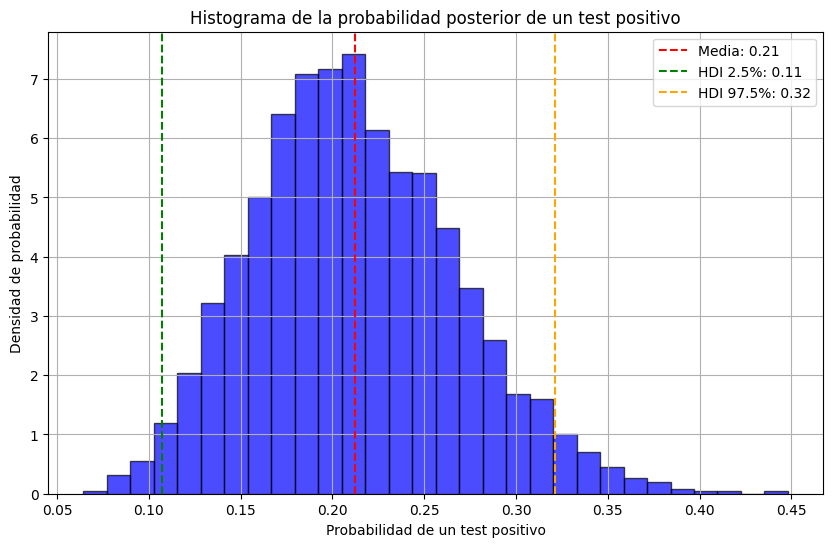

In [ ]:
# Modelo 1: Test perfecto (siempre dice la verdad)
tests_totales = 50
tests_positivos = 10

with pm.Model() as modelo_test_perfecto:
    prob = pm.Uniform(name='prob', lower=0, upper=1)  # Variable que queremos estimar

    casos_positivos = pm.Binomial(name='casos_positivos', p=prob, n=tests_totales,
                                   observed=tests_positivos)  # Datos observados

    trace_test_perfecto = pm.sample(3000, return_inferencedata=False)  # Saca 3000 muestras del modelo

# Extraer las muestras de la variable 'prob'
muestras_prob = trace_test_perfecto['prob']

# Calcular la media y el HDI
media_prob = np.mean(muestras_prob)
hdi_prob = az.hdi(muestras_prob, hdi_prob=0.95)  # 95% HDI

# Crear un histograma de las muestras
plt.figure(figsize=(10, 6))
plt.hist(muestras_prob, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media_prob, color='red', linestyle='--', label='Media: {:.2f}'.format(media_prob))
plt.axvline(hdi_prob[0], color='green', linestyle='--', label='HDI 2.5%: {:.2f}'.format(hdi_prob[0]))
plt.axvline(hdi_prob[1], color='orange', linestyle='--', label='HDI 97.5%: {:.2f}'.format(hdi_prob[1]))

# Configuración de la gráfica
plt.xlabel('Probabilidad de un test positivo')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de la probabilidad posterior de un test positivo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ¿Cuál es la probabilidad de que menos de 15% de la población se haya infectado?

with pm.Model() as modelo_test_perfecto:
	prob = pm.Uniform(name = 'prob', lower = 0, upper = 1) # Variable que queremos estimar, con una distribución uniforme,
                                                         # al decir que es uniforme nos referimos a que todos los valores
                                                         # son igual de probables

	casos_positivos = pm.Binomial(name = 'casos_positivos', p = prob, n = tests_totales,
		observed = tests_positivos) # Los datos se generan siguiendo una distribución binomial

	trace_test_perfecto = pm.sample(3000) # Saca 3000 muestras del modelo

muestras_prop = trace_test_perfecto.posterior['prob'].values.flatten()  # Extrae las muestras y las aplana
proporcion_baja_prob = len(muestras_prop[muestras_prop < 0.15]) / len(muestras_prop)
print(proporcion_baja_prob)

Output()

Output()

0.132


Output()

Output()

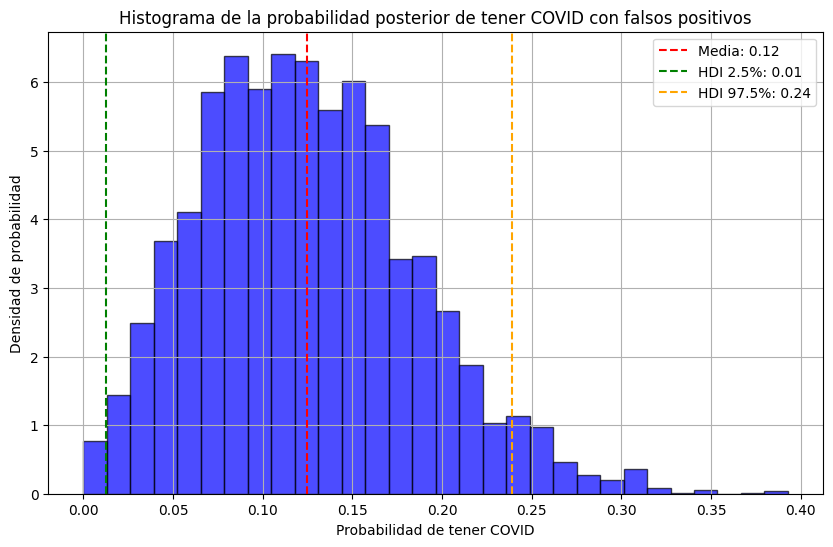

In [ ]:
# Modelo 2: Test a veces da falsos positivos
tests_totales = 50
tests_positivos = 10

with pm.Model() as modelo_con_fp:
    prob_cov = pm.Uniform(name='prob_cov', lower=0, upper=1)
    prob_fp = 0.1  # Probabilidad de falsos positivos
    prob_test_positivo = prob_cov + (1 - prob_cov) * prob_fp  # Relación entre la probabilidad de tener COVID y falsos positivos

    casos_positivos = pm.Binomial(name='casos_positivos',
                                   p=prob_test_positivo, n=tests_totales,
                                   observed=tests_positivos)

    trace_con_fp = pm.sample(3000, return_inferencedata=False)  # Saca 3000 muestras del modelo

# Extraer las muestras de la variable 'prob_cov'
muestras_prob_cov = trace_con_fp['prob_cov']

# Calcular la media y el HDI
media_prob_cov = np.mean(muestras_prob_cov)
hdi_prob_cov = az.hdi(muestras_prob_cov, hdi_prob=0.95)  # 95% HDI

# Crear un histograma de las muestras
plt.figure(figsize=(10, 6))
plt.hist(muestras_prob_cov, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media_prob_cov, color='red', linestyle='--', label='Media: {:.2f}'.format(media_prob_cov))
plt.axvline(hdi_prob_cov[0], color='green', linestyle='--', label='HDI 2.5%: {:.2f}'.format(hdi_prob_cov[0]))
plt.axvline(hdi_prob_cov[1], color='orange', linestyle='--', label='HDI 97.5%: {:.2f}'.format(hdi_prob_cov[1]))

# Configuración de la gráfica
plt.xlabel('Probabilidad de tener COVID')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de la probabilidad posterior de tener COVID con falsos positivos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ¿Cuál es la probabilidad de que menos de 15% de la población se haya infectado?

# Modelo 2: Test a veces da falsos positivos
with pm.Model() as modelo_con_fp:
	prob_cov = pm.Uniform(name = 'prob_cov', lower = 0, upper = 1)
	prob_fp = 0.1 # Probabilidad de falsos positivos
	prob_test_positivo = prob_cov + (1-prob_cov)*prob_fp # Formula que define la relación entre la probabilidad de tener
                                                       # COVID y la probabilidad de un falso positivo

	casos_positivos = pm.Binomial(name = 'casos_positivos',
		p = prob_test_positivo, n = tests_totales,
		observed = tests_positivos)
	# modelo_con_fp = pm.sample(3000)
	trace_con_fp = pm.sample(3000)

# Accede a las muestras de 'prob_cov'
muestras_prop = trace_con_fp.posterior['prob_cov'].values.flatten()  # Extrae las muestras y las aplana

# Calcula la proporción de muestras donde prob_cov es menor que 0.15
proporcion_baja_prob = len(muestras_prop[muestras_prop < 0.15]) / len(muestras_prop)
print(proporcion_baja_prob)

Output()

Output()

0.668


In [ ]:
# Modelo 3: Incluye la incertidumbre sobre la tasa de falsos positivos
lab_fp_observados = 10
lab_tests_hechos = 100

with pm.Model() as modelo_con_incertidumbre:
	prob_fp = pm.Uniform(name = 'prob_fp', lower = 0, upper = 1)

	test_de_falsos_positivos = pm.Binomial(name = 'test_de_falsos_positivos',
		p = prob_fp, n = lab_tests_hechos,
		observed = lab_fp_observados)

	prob_cov = pm.Uniform(name = 'prob_cov', lower = 0, upper = 1)

	prob_test_positivo = prob_cov + (1-prob_cov)*prob_fp
	casos_positivos = pm.Binomial(name = 'casos_positivos',
		p = prob_test_positivo, n = tests_totales,
		observed = tests_positivos)
	trace_modelo_con_incertidumbre = pm.sample(3000)

Output()

Output()

Output()

Output()

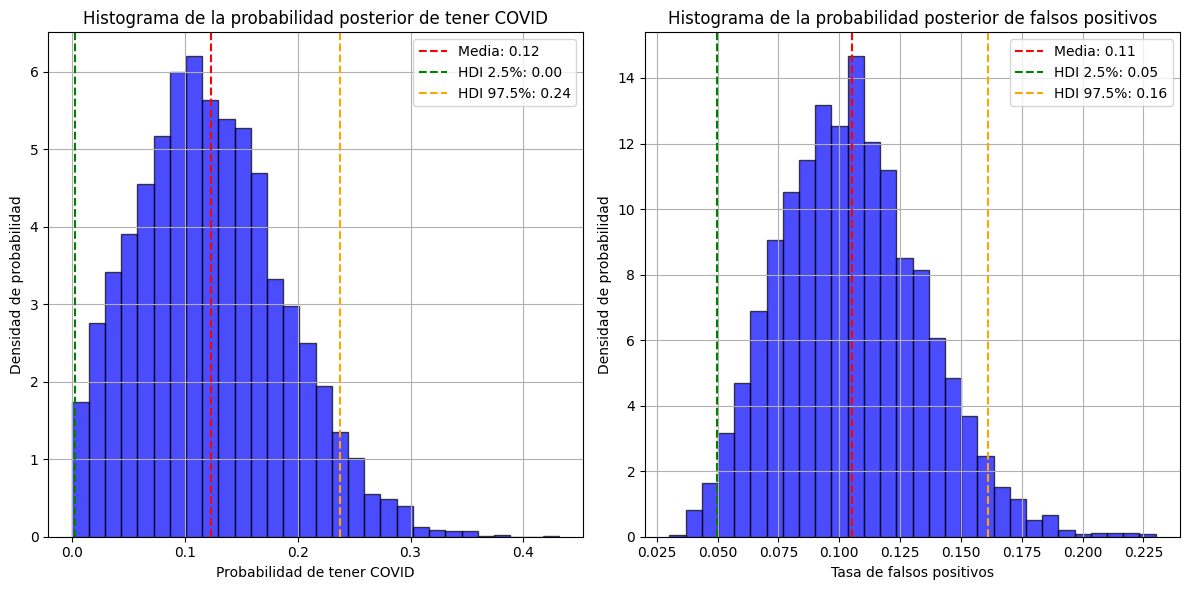

In [ ]:
# Modelo 3: Incluye la incertidumbre sobre la tasa de falsos positivos
lab_fp_observados = 10
lab_tests_hechos = 100
tests_totales = 50
tests_positivos = 10

with pm.Model() as modelo_con_incertidumbre:
    prob_fp = pm.Uniform(name='prob_fp', lower=0, upper=1)

    test_de_falsos_positivos = pm.Binomial(name='test_de_falsos_positivos',
                                            p=prob_fp, n=lab_tests_hechos,
                                            observed=lab_fp_observados)

    prob_cov = pm.Uniform(name='prob_cov', lower=0, upper=1)

    prob_test_positivo = prob_cov + (1 - prob_cov) * prob_fp
    casos_positivos = pm.Binomial(name='casos_positivos',
                                   p=prob_test_positivo, n=tests_totales,
                                   observed=tests_positivos)

    trace_modelo_con_incertidumbre = pm.sample(3000, return_inferencedata=False)  # Saca 3000 muestras del modelo

# Extraer las muestras de las variables 'prob_cov' y 'prob_fp'
muestras_prob_cov = trace_modelo_con_incertidumbre['prob_cov']
muestras_prob_fp = trace_modelo_con_incertidumbre['prob_fp']

# Calcular la media y el HDI para prob_cov
media_prob_cov = np.mean(muestras_prob_cov)
hdi_prob_cov = az.hdi(muestras_prob_cov, hdi_prob=0.95)

# Calcular la media y el HDI para prob_fp
media_prob_fp = np.mean(muestras_prob_fp)
hdi_prob_fp = az.hdi(muestras_prob_fp, hdi_prob=0.95)

# Crear un histograma de las muestras para prob_cov
plt.figure(figsize=(12, 6))

# Subgráfico para prob_cov
plt.subplot(1, 2, 1)
plt.hist(muestras_prob_cov, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media_prob_cov, color='red', linestyle='--', label='Media: {:.2f}'.format(media_prob_cov))
plt.axvline(hdi_prob_cov[0], color='green', linestyle='--', label='HDI 2.5%: {:.2f}'.format(hdi_prob_cov[0]))
plt.axvline(hdi_prob_cov[1], color='orange', linestyle='--', label='HDI 97.5%: {:.2f}'.format(hdi_prob_cov[1]))
plt.xlabel('Probabilidad de tener COVID')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de la probabilidad posterior de tener COVID')
plt.legend()
plt.grid(True)

# Subgráfico para prob_fp
plt.subplot(1, 2, 2)
plt.hist(muestras_prob_fp, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media_prob_fp, color='red', linestyle='--', label='Media: {:.2f}'.format(media_prob_fp))
plt.axvline(hdi_prob_fp[0], color='green', linestyle='--', label='HDI 2.5%: {:.2f}'.format(hdi_prob_fp[0]))
plt.axvline(hdi_prob_fp[1], color='orange', linestyle='--', label='HDI 97.5%: {:.2f}'.format(hdi_prob_fp[1]))
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de la probabilidad posterior de falsos positivos')
plt.legend()
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()